<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

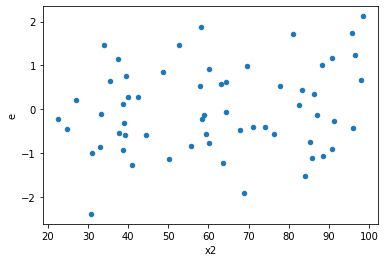

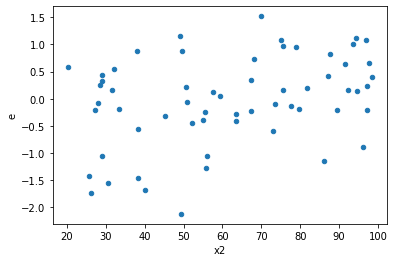

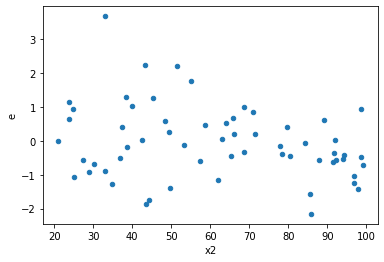

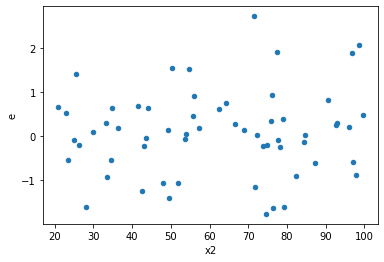

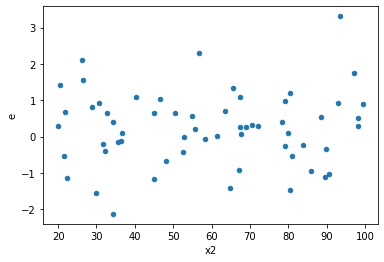

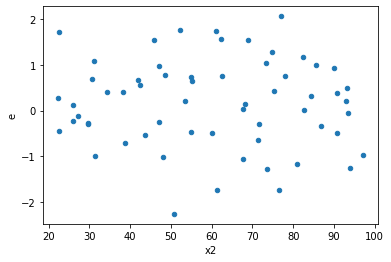

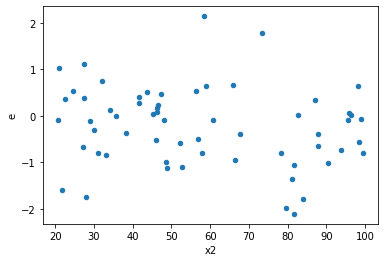

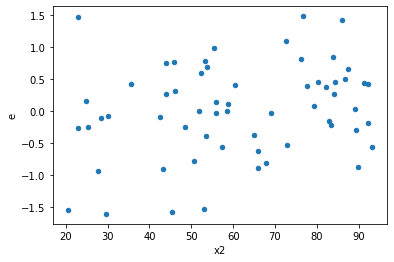

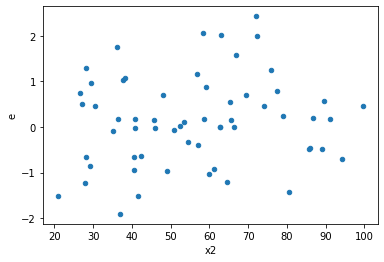

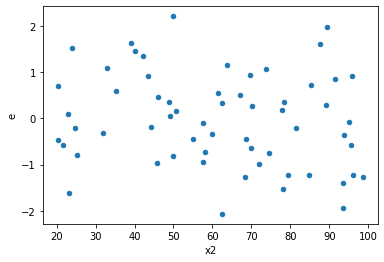

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,25.0,31.0,10.751382150700591,21.946998813203876,0.4300552860280236,0.707967703651738,1.6462248614370125,0.18746538637542143,0.9062673068122893,0.09373269318771071,Reject001=1 : Homoscedasticity
2.0,32.0,24.0,17.180503638528748,43.74852073164822,0.5368907387040234,1.8228550304853426,3.3952066949142226,0.0028383089257173477,0.9985808455371413,0.0014191544628586739,Reject001=0 : Heteroscedasticity
3.0,27.0,29.0,17.587824460715577,33.64005622142271,0.6514009059524288,1.1600019386697487,1.7807803582552315,0.13063895405447323,0.9346805229727634,0.06531947702723662,Reject001=1 : Homoscedasticity
4.0,29.0,27.0,27.998242092835092,29.11844023267777,0.9654566238908653,1.078460749358436,1.1170473356039086,0.7754317078454032,0.6122841460772984,0.3877158539227016,Reject001=1 : Homoscedasticity
5.0,29.0,27.0,25.061005362817372,29.533515449303273,0.8641725987178405,1.0938339055297508,1.2657586078899692,0.5408677340991384,0.7295661329504308,0.2704338670495692,Reject001=1 : Homoscedasticity
6.0,34.0,22.0,22.12734102903693,18.546468245306954,0.6508041479128509,0.8430212838775888,1.2953532742241798,0.5299811815934647,0.7350094092032676,0.2649905907967324,Reject001=1 : Homoscedasticity
7.0,34.0,22.0,14.934582936850248,10.42746495296145,0.43925243931912494,0.47397567968006593,1.0790507627339865,0.8677626166579295,0.5661186916710352,0.43388130832896477,Reject001=1 : Homoscedasticity
8.0,28.0,28.0,24.54513991277032,27.242359641266543,0.8766121397417972,0.9729414157595194,1.1098881382661385,0.7845985722397935,0.6077007138801033,0.39229928611989673,Reject001=1 : Homoscedasticity
9.0,27.0,29.0,26.975580536988215,29.05678480823947,0.999095575444008,1.001958096835844,1.0028651126700905,0.9904072038022917,0.5047963980988541,0.4952036019011459,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,33.0,23.0,35.310576802670326,17.86992691708421,1.0700174788687977,0.7769533442210527,0.7261127594312133,0.39265936756020053,Reject001=1 : Homoscedasticity
1.0,25.0,31.0,10.751382150700591,21.946998813203876,0.4300552860280236,0.707967703651738,1.6462248614370125,0.18746538637542143,Reject001=1 : Homoscedasticity
2.0,32.0,24.0,17.180503638528748,43.74852073164822,0.5368907387040234,1.8228550304853426,3.3952066949142226,0.0028383089257173477,Reject001=0 : Heteroscedasticity
3.0,27.0,29.0,17.587824460715577,33.64005622142271,0.6514009059524288,1.1600019386697487,1.7807803582552315,0.13063895405447323,Reject001=1 : Homoscedasticity
4.0,29.0,27.0,27.998242092835092,29.11844023267777,0.9654566238908653,1.078460749358436,1.1170473356039086,0.7754317078454032,Reject001=1 : Homoscedasticity
5.0,29.0,27.0,25.061005362817372,29.533515449303273,0.8641725987178405,1.0938339055297508,1.2657586078899692,0.5408677340991384,Reject001=1 : Homoscedasticity
6.0,34.0,22.0,22.12734102903693,18.546468245306954,0.6508041479128509,0.8430212838775888,1.2953532742241798,0.5299811815934647,Reject001=1 : Homoscedasticity
7.0,34.0,22.0,14.934582936850248,10.42746495296145,0.43925243931912494,0.47397567968006593,1.0790507627339865,0.8677626166579295,Reject001=1 : Homoscedasticity
8.0,28.0,28.0,24.54513991277032,27.242359641266543,0.8766121397417972,0.9729414157595194,1.1098881382661385,0.7845985722397935,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      989
Reject001=0 : Heteroscedasticity     11
Name: Result_test, dtype: int64